# Random matrices: homework 1 due September 11, 2019


# Goal -- set up a Julia laboratory for many experiments to come

# For this pset we really just want you to execute the lines and try to understand either the math or the software or both.

# (see piazza for those wanting to do all math theory)

(a video of how to do this homework will be setup this weekend)

Submit this notebook via Gradescope; instructions to follow.

#### Exercise 1 (Set-up)

(1.)  Follow the detailed instructions [here](https://github.com/mitmath/julia-mit) to:

  - Download the current stable version (1.2) of Julia for your machine from [here](https://julialang.org/downloads) and install it. 

  - Run the Julia executable.    
    
  - Install the IJulia package that provides an interface to the Jupyter notebook.
    
  - Run IJulia by typing `using IJulia; notebook()` at the Julia prompt.
    
(2a.) (If you know about github or want to learn go to 2b).  You can download the hw easily
from [here](https://nbviewer.jupyter.org/github/mitmath/18338/blob/master/HW/Random%20matrices%20HW1.ipynb) by
right clicking on the icon on the upper right and do "save link as" or equivalent.

(2b.) Alternatively -- -Clone a copy of this repository to your machine using `git clone https://github.com/mitmath/18338.git` from a terminal, or alternatively using a visual git client like GitKraken. 

 


(3.) Open the homework 1 notebook. Make a copy of the notebook using `File->Make a copy` from the `File` menu. Change the name of the copy to add your name as in HW1.alan_edelman.ipynb

(4) Figure out how to enter 1+1 in a cell in Jupyter and get 2 with SHIFT + ENTER.  Stay tuned: a video may come soon.



#### Exercise 2 (Distributions with examples of how to draw nice pictures with Julia)

(1). Follow the instructions [here](https://juliastats.github.io/Distributions.jl/stable/starting/) to create a standard normal distribution object and draw 1000 samples from it using the `Distributions.jl` package.




In [ ]:
]add Distributions 

In [19]:
using Random, Distributions
d = Normal()
x = rand(d,5) # change 5 to 1000

5-element Array{Float64,1}:
 -0.5545632910731029 
  0.96744983402253   
 -0.03135964678457501
  1.4286887101109487 
 -0.593299399789262  

(2). Use the `histogram` command from the `Plots.jl` package to draw a histogram of the result, using the `normalize=true` keyword argument to normalize the result to area 1.
You can fix the number of histogram bins with the `bins=` keyword argument.

<br>
Warning: plots takes forever the first time it compiles 


In [ ]:
]add Plots  

In [20]:
using Plots

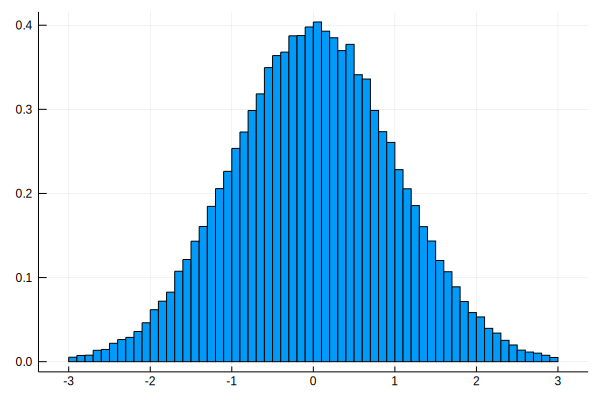

In [21]:
# draw a histogram plot, which requires the keyword argument "bins" if you wish to specify the bins
r = rand(d,10^5)
Plots.histogram(r, normalize = true, bins = -3:.1:3, legend = false)

In [ ]:
]add StatsBase

In [22]:
using StatsBase

In [23]:
h = fit(Histogram, r,  -3:.1:3) # create a histogram object with counts

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [53, 74, 77, 135, 145, 218, 262, 288, 358, 461  …  530, 395, 339, 253, 198, 137, 114, 101, 76, 50]
closed: left
isdensity: false

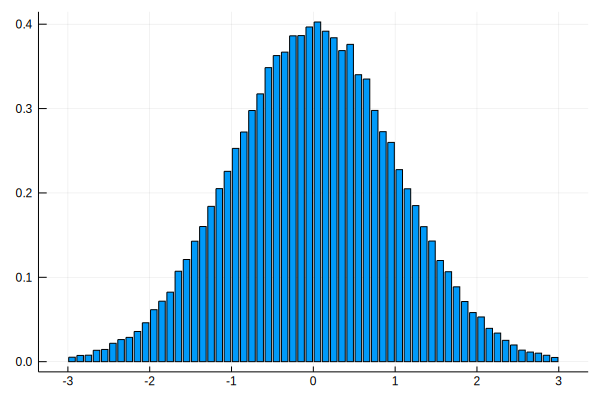

In [24]:
Plots.bar(h.edges,h.weights/Float64(h.edges[1].step)/length(r), legend=false) # normalize to have area = 1

In [25]:
#  Have Julia normalize for you
h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)

Histogram{Float64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [0.005316214454084959, 0.007422639049099755, 0.007723556848387582, 0.013541300967952254, 0.014544360298911681, 0.021866693414915494, 0.026280154471136966, 0.028888108731631477, 0.03590952404834746, 0.04624103515722955  …  0.05316214454084959, 0.03962084357289734, 0.03400371131952455, 0.025377401073273485, 0.01986057475299664, 0.01374191283414414, 0.011434876372937459, 0.010130899242690205, 0.007623250915291639, 0.005015296654797131]
closed: left
isdensity: true

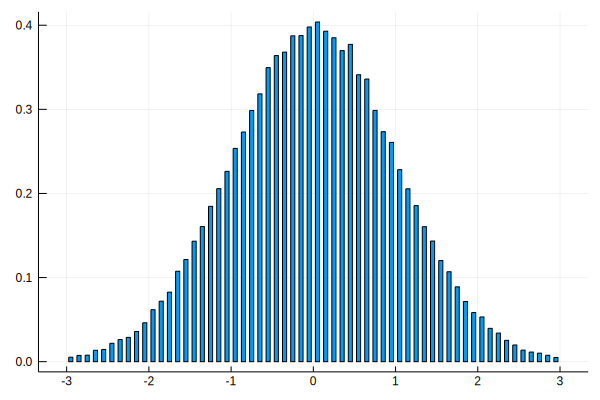

In [26]:
Plots.bar(h.edges, h.weights, legend=false, bar_width = .05) # or even a bar chart which has spaces betwen the bars

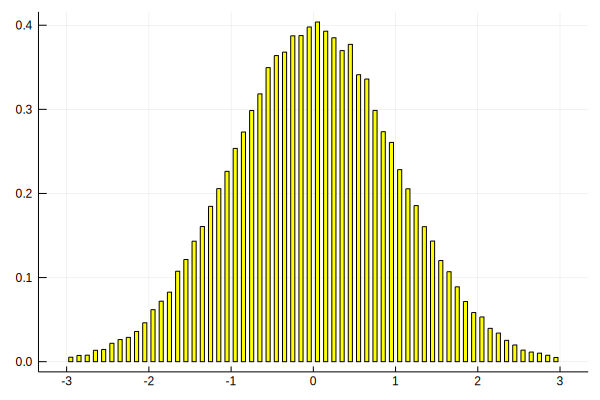

In [27]:
Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)  # make the color yellow

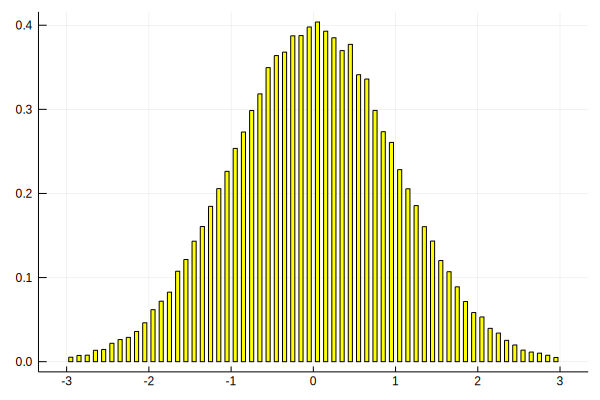

In [28]:
Plots.bar(h.edges,h.weights, fillcolor = RGB(1,1,0), bar_width = .05, legend=false) # your own r,g,b value

(3.) Use the `plot!` command to draw the exact PDF of the distribution on top.


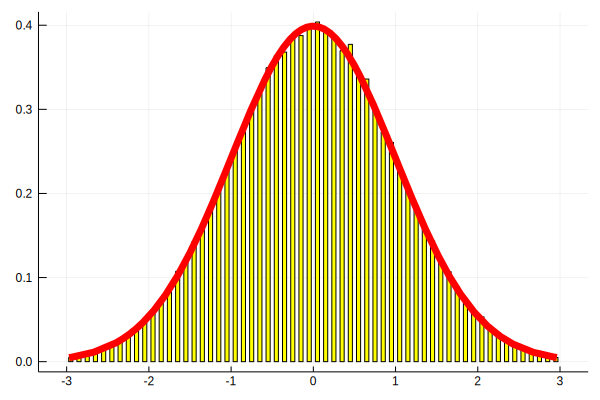

In [29]:
plot!( x-> exp(-x^2/2)/√(2π),-3,3, color=:red, lw=7)

(4.) Use the function `pdf` from the `Distributions.jl` package to do the same, without needing to explicitly type the formula for the PDF.

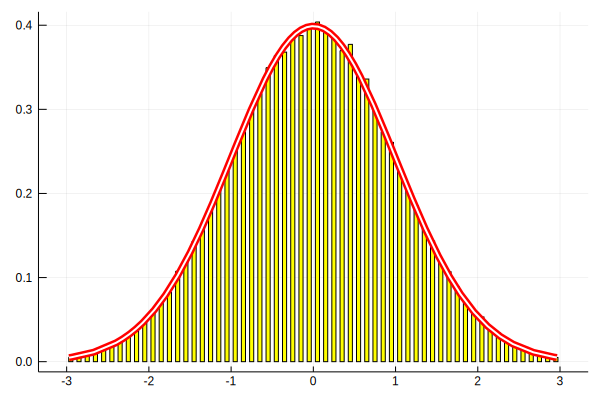

In [30]:
plot!( x->pdf(d,x), -3,3, color=:white, lw=2)

(5.) Use the `@manipulate` command from the `Interact.jl` package to interactively change the number of samples used for the histogram.  (unfortunately @manipulate may be flaky, don't sweat it)

In [31]:
using Interact

In [32]:
@manipulate for i= togglebuttons( 1:5 )
    i
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "1","val" => 1,"id" => "id0vG43qK8"), OrderedDict{String,Any}("key" => "2","val" => 2,"id" => "idQtikalNn"), OrderedDict{String,Any}("key" => "3","val" => 3,"id" => "id8TuuQ92l"), OrderedDict{String,Any}("key" => "4","val" => 4,"id" => "idm2WuxU1A"), OrderedDict{String,Any}("key" => "5","val" => 5,"id" => "idmegWIHJd")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e4f4010, Task (runnable) @0x000000012e4f4010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"12708674115930772127\",\"id\":\"ob_16\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"12708674115930772127\",\"id\":\"ob_15\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array

In [33]:
@manipulate for n = togglebuttons(  10 .^ [1,2,3,4,5,6])
    r = rand(Normal(),n)
    h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), -3,3, color=:red, lw=2, ylim=(0,.5))
end
 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "10","val" => 1,"id" => "idJiC53qtJ"), OrderedDict{String,Any}("key" => "100","val" => 2,"id" => "idwva7aoOj"), OrderedDict{String,Any}("key" => "1000","val" => 3,"id" => "idBy6nH9p6"), OrderedDict{String,Any}("key" => "10000","val" => 4,"id" => "id1SsNlCTu"), OrderedDict{String,Any}("key" => "100000","val" => 5,"id" => "id3fGc6Jpf"), OrderedDict{String,Any}("key" => "1000000","val" => 6,"id" => "idHWDEE5Ct")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e4f4490, Task (runnable) @0x000000012e4f4490), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"17510559291074093506\",\"id\":\"ob_27\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"17510559291074093506\",\"id\":\"ob_26\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (

(6.) Repeat the above steps for the chi distribution with "2.8 degrees of freedom". How could you generalize this for any distribution?

In [34]:
@manipulate for n = togglebuttons(10 .^ (1:6))
    println(n)
    d = Chi(2.8)
    r = rand(d,n)
    h = StatsBase.normalize( fit(Histogram, r,  0:.1:4) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), 0,4, color=:red, lw=2, ylim=(0,.8))
end

10


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "10","val" => 1,"id" => "idCHU5pA7q"), OrderedDict{String,Any}("key" => "100","val" => 2,"id" => "idgj2zndaB"), OrderedDict{String,Any}("key" => "1000","val" => 3,"id" => "idDj7DOJWk"), OrderedDict{String,Any}("key" => "10000","val" => 4,"id" => "idE9kK3KMA"), OrderedDict{String,Any}("key" => "100000","val" => 5,"id" => "idwm4TQ9tB"), OrderedDict{String,Any}("key" => "1000000","val" => 6,"id" => "idb9Aygkha")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/alanedelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/alanedelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e4f3a90, Task (runnable) @0x000000012e4f3a90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"10333703396661176413\",\"id\":\"ob_38\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"10333703396661176413\",\"id\":\"ob_37\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (

#### Exercise 3 (Eigenvalues of symmetric random matrices; the semicircle law)

(1.) Generate a random gaussian matrix of size $n \times n$.  

In [35]:
using LinearAlgebra

In [36]:
n = 1000
A = rand(Normal(),n,n);

(2.) Symmetrize the matrix using the transpose operator `'`  (apostrophe) and `+` , and then create a version of type `Symmetric`.

In [37]:
A = Symmetric((A+A')/2);

(3.) Use `eigvals` from the `LinearAlgebra` standard library to calculate the eigenvalues of the matrix.  (NB: Standard libraries do *not* need to be installed; they come together with the Julia installation.)

In [38]:
n = 2000
A = rand(Normal(),n,n)
A = Symmetric(A+A')
λ = eigvals(A)/√(2n);

(4.) Histogram the eigenvalues to see the semicircle law. 

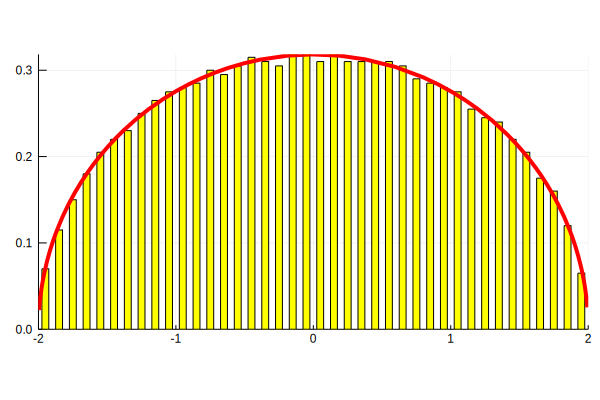

In [39]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.05, legend = false)

plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(5.) Use e.g. `append!` to combine the results from many runs into a single data vecxtor. Histogram the data you have collected, and compare it to the exact result (semicircle law).


In [40]:
 GOE(n) = (A = rand(Normal(),n,n); Symmetric(A+A'))
 
 t = 3000
 n = 50
 λ = Float64[]
 for i=1:t
     append!(λ, eigvals(GOE(n)))
 end
 λ ./= √(2n);

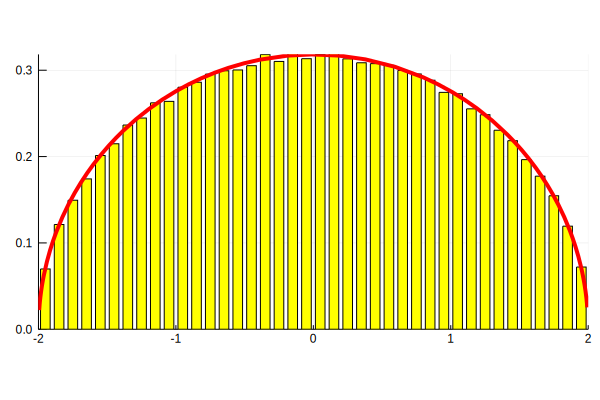

In [41]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.07, legend = false)
plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(6.) Make an interactive visualization in which you can vary the number of trials and size of matrices. Comment on the results

#### Exercise 4 (Singular values)

1. Follow a similar approach as in exercise 3 to visualize the Marčenko-Pastur law on singular values of a rectangular matrix, using the `svdvals` function.

In [42]:
t = 3000
m,n = 100,50
σ = Float64[]
for i=1:t
  append!(σ, svdvals(rand(Normal(),m,n)))
end
σ ./= √m
r = n/m  # choose m ≥ n
a = (1-√r)
b = (1+√r)

1.7071067811865475

In [43]:
r # should be ≤ 1

0.5

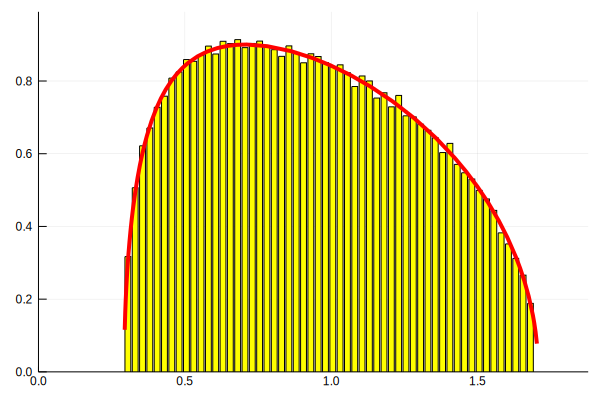

In [44]:
Plots.histogram(σ, normalize = true, color=:yellow, bins = a:.025:b,  bar_width=.02, legend = false)
plot!(x->sqrt( (x^2-a^2)*(b^2-x^2))/(π*x*r), a,b, color=:red, lw=4, xlim=(0,b*1.1), ylim=(0,1.1*(b-a)/(r*π)))

#### Exercise 5 (Generalized singular values)


1. Follow a similar approach as in exercise 3 to visualize the Wachter law on the generalized singular values of a matrix, using the `svdvals(A, B)` method.

In [45]:
t = 1000
m₁,m₂,n = 100, 50, 50

σ = Float64[]
for i=1:t
  append!(σ, svdvals( rand(Normal(),m₁,n) ,  rand(Normal(),m₂,n)))
end

a,b = m₁/n, m₂/n
σ₋ = √( (a/(a+b))*(1-1/(a+b))) - √( (1/(a+b))*(1-a/(a+b)))
σ₊ = √( (a/(a+b))*(1-1/(a+b))) + √( (1/(a+b))*(1-a/(a+b)))

σcos = σ./sqrt.(σ.^2 .+ 1);

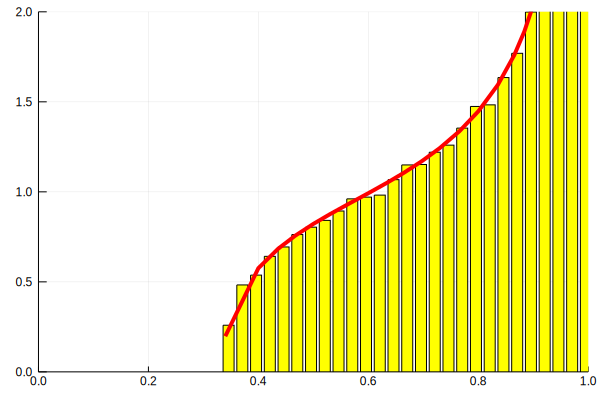

In [46]:
Plots.histogram(σcos, normalize = true, color=:yellow, bins = σ₋:.025:4*σ₊,  bar_width=.02, legend = false)
wachter = x -> (a+b) * √( (x^2-σ₋^2)*(σ₊^2-x^2)) / (π*x*(1-x^2)    )
plot!(wachter, σ₋,σ₊, color=:red, lw=4, xlim=(0,1) , ylim=(0,2))

#### (Optional)  Exercise 6 (Parallel computing) 

In this exercise we will parallelize a random matrix calculation in a simple way.


(1.) Install the `DistributedArrays.jl` package. 

In [47]:
]add DistributedArrays

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [48]:
using Distributed
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [49]:
using DistributedArrays

(2.) Load the `Distributed.jl` stdlib package. Use the `addprocs` function to add 2 processes (assuming that you have a multicore machine).

In [50]:
nprocs()

5

In [51]:
@everywhere using DistributedArrays, Distributions, LinearAlgebra, StatsBase
for w in workers()
   remotecall(BLAS.set_num_threads, w, 1)
end

(3.) Create a `DArray` ("distributed array") `d`, e.g. using the array comprehension syntax `d = @DArray [i for i in 1:2]`.

In [58]:
@everywhere function symeigs(n::Integer)
    A = rand(Normal(),n,n)
    A = Symmetric(A+A')
    return eigvals(A)/√(2n)
end

In [59]:
function serialhistofeigs(n::Integer, nreps::Integer)
    hists = [fit(Histogram, symeigs(n), -2.5:0.5:2.5) for i in 1:nreps]
    return reduce(merge, hists)
end

serialhistofeigs (generic function with 1 method)

In [60]:
function parallelhistofeigs(n::Integer, nreps::Integer)
    d = distribute(fill(n, nreps))
    v = symeigs.(d)
    hists = fit.(Histogram, v, (-2.5:0.5:2.5 ,))
    return reduce(merge, hists)
end

parallelhistofeigs (generic function with 1 method)

In [61]:
function parallelhistofeigs(n::Integer, nreps::Integer)
    nrepsw = ceil(Int, nreps/nworkers())
    dhists = map(workers()) do w
        remotecall(w) do
            hists = [fit(Histogram, symeigs(n), -2.5:0.5:2.5) for i in 1:nrepsw]
            reduce(merge, hists)
        end
    end
    reduce(merge, map(fetch, dhists))
end

parallelhistofeigs (generic function with 1 method)

In [62]:
@time serres = serialhistofeigs(1000, 10);

  1.406257 seconds (395.85 k allocations: 253.745 MiB, 3.93% gc time)


In [64]:
@time parres = parallelhistofeigs(1000, 10);

  0.586797 seconds (855 allocations: 34.375 KiB)


In [57]:
plot(parres)

UndefVarError: UndefVarError: parres not defined

(4.) Define a function `f` that will run the simulation from exercise 3 and returns a data vector of data.  *Broadcast* this function over the `d` using the syntax `f.(d)`.
This should return a new `DArray`.


(5.) Broadcast `fit(Histogram, v)` from the `StatsBase` package over this result. This should give another `DArray`; call it `hists`.


(6.) Use the `reduce(merge, hists)` function to combine the two histograms into one.


(7.) Compare the total time taken for this parallel version to a serial version.

In [ ]:
fetch(@spawnat 3 symeigs(2))

In [ ]:
remotecall_fetch(symeigs, 2, 5)